In [1]:
import tensorflow_datasets as tfds

# Download the subword encoded pretokenized dataset
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)

# Get the tokenizer
tokenizer = info.features['text'].encoder

/Users/geonheekim/Desktop/study/python/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
BUFFER_SIZE = 10000
BATCH_SIZE = 256

# Get the train and test splits
train_data, test_data = dataset['train'], dataset['test'], 

# Shuffle the training data
train_dataset = train_data.shuffle(BUFFER_SIZE)

# Batch and pad the datasets to the maximum length of the sequences
train_dataset = train_dataset.padded_batch(BATCH_SIZE)
test_dataset = test_data.padded_batch(BATCH_SIZE)

In [3]:
import tensorflow as tf
import numpy as np

random_input = np.random.rand(1, 20, 20)
print(random_input.shape)

conv1d = tf.keras.layers.Conv1D(filters=128, kernel_size=5, activation='relu')
result = conv1d(random_input)
print(result.shape)

gmp = tf.keras.layers.GlobalMaxPooling1D()
result = gmp(result)
print(result.shape)

(1, 20, 20)
(1, 16, 128)
(1, 128)


In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(filters=5, kernel_size=5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_2          │ ?                      │   0 (unbuilt) │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data = test_dataset)

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step - accuracy: 0.6085 - loss: 0.6705 - val_accuracy: 0.7623 - val_loss: 0.5048
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.7998 - loss: 0.4492 - val_accuracy: 0.8206 - val_loss: 0.3992
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - accuracy: 0.8933 - loss: 0.2825 - val_accuracy: 0.8361 - val_loss: 0.3746
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy: 0.9444 - loss: 0.1631 - val_accuracy: 0.8385 - val_loss: 0.3932
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - accuracy: 0.9761 - loss: 0.0893 - val_accuracy: 0.8363 - val_loss: 0.4389
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.9914 - loss: 0.0440 - val_accuracy: 0.8372 - val_loss: 0.4898
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - accuracy: 0.9972 - loss: 0.0214 - val_accuracy: 0.8363 - val_loss: 0.5404
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy: 0.9989 - loss: 0.0114 - val_accuracy: 0.8378 - 

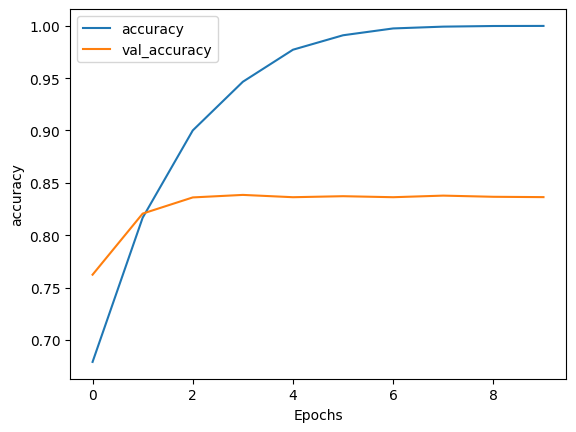

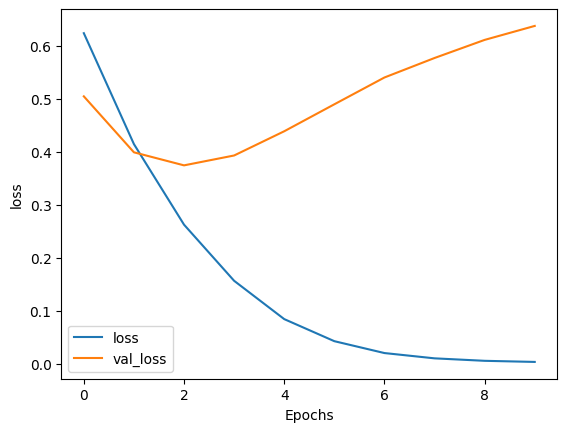

In [8]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and results 
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")